## Assignment-01
1. 第一节课的作业如下：
复现课程的代码， BFS 路线搜索与文本自动生成；
进一步体会 Data Driving的编程思想，完成你的第一个较为复杂的对话机器人。
2. 如何提交
代码 + 此 jupyter 相关，提交至自己的 github 中；
第2问，整理发送至deeplearning.nlp.zh@gmail.com邮箱。
3. 截止时间
此次作业截止时间为 2019.4.6日

### 1-BFS 路线搜索复现

In [1]:
connection = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

In [2]:
import networkx as nx

In [3]:
%matplotlib inline

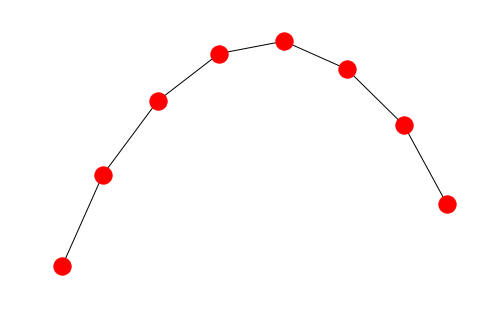

In [84]:
graph = connection
g = nx.Graph(graph)
nx.draw(g)

#### 广度优先算法 BFS

In [5]:
def navigator_bfs(start,destination,connection_graph):
    paths = [start]
    seen = set()
    
    while paths:
        frontier = paths.pop(0)
        if frontier in seen: continue
        
        successors = connection_graph[frontier]
        print ('standing on {} looking forward {}'.format(frontier,successors))
        paths = paths + successors
        
        seen.add(frontier)
    

In [6]:
navigator_bfs(0,7,connection)

standing on 0 looking forward [1, 5]
standing on 1 looking forward [0, 2]
standing on 5 looking forward [0, 6]
standing on 2 looking forward [1, 3]
standing on 6 looking forward [5, 7]
standing on 3 looking forward [2, 4]
standing on 7 looking forward [6]
standing on 4 looking forward [3]


#### 深度优先算法DFS

In [7]:
def navigator_dfs(start,destination,connection_graph):
    paths = [start]
    seen = set()
    
    while paths:
        frontier = paths.pop(0)
        if frontier in seen: continue
        
        successors = connection_graph[frontier]
        print ('standing on {} looking forward {}'.format(frontier,successors))
        paths = successors + paths
        
        seen.add(frontier)

In [8]:
navigator_dfs(0,7,connection)

standing on 0 looking forward [1, 5]
standing on 1 looking forward [0, 2]
standing on 2 looking forward [1, 3]
standing on 3 looking forward [2, 4]
standing on 4 looking forward [3]
standing on 5 looking forward [0, 6]
standing on 6 looking forward [5, 7]
standing on 7 looking forward [6]


In [9]:
def navigator(start,destination,connection_graph):
    paths = [[start]]
    seen = set()
    
    while paths:
        path = paths.pop(0)
        frontier = path[-1]
        
        if frontier in seen: continue
        
        successors = connection_graph[frontier]
        
        for s in successors:
            if s == destination:
                path.append(s)
                return path
            else: paths.append(path+[s])
        
        paths = sorted(paths,key = len)#最小换乘
        seen.add(frontier)

In [10]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()
connection_city = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [11]:
navigator(CHANGCHUN, WUHAN, connection_city)

['CHANGCHUN', 'BEIJING', 'WUHAN']

### 2-文本自动生成

In [12]:
import random

In [13]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [14]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [15]:
parse_grammar(grammar)

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [16]:
def gene(grammar_parsed,target = 'sentence'):
    if target not in grammar_parsed: return target
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed,target = r) for r in rule if r != 'null')

In [17]:
gene(parse_grammar(grammar))

'一个篮球听着一个小猫'

###  3-基于模式匹配的对话机器人实现
###### Pattern Match

机器能否实现对话，这个长久以来是衡量机器人是否具有智能的一个重要标志。 Alan Turing早在其文中就提出过一个测试机器智能程度的方法，该方法主要是考察人类是否能够通过对话内容区分对方是机器人还是真正的人类，如果人类无法区分，我们就称之为具有”智能“。而这个测试，后来被大家叫做”图灵测试“，之后也被翻拍成了一步著名电影，叫做《模拟游戏》。

既然图灵当年以此作为机器是否具备智能的标志，这项任务肯定是复杂的。自从 1960s 开始，诸多科学家就希望从各个方面来解决这个问题，直到如今，都只能解决一部分问题。 目前对话机器人的建立方法有很多，今天的作业中，我们为大家提供一个快速的基于模板的对话机器人配置方式。
此次作业首先希望大家能够读懂这段程序的代码，其次，在此基于我们提供的代码，能够把它改造成汉语版本，实现对话效果。

Pattern: (我想要A)
Response: (如果你有 A，对你意味着什么呢？)

Input: (我想要度假)
Response: (如果你有度假，对你意味着什么呢？)

为了实现模板的判断和定义，我们需要定义一个特殊的符号类型，这个符号类型就叫做"variable"， 这个"variable"用来表示是一个占位符。例如，定义一个目标: "I want X"， 我们可以表示成 "I want ?X", 意思就是?X是一个用来占位的符号。
如果输入了"I want holiday"， 在这里 'holiday' 就是 '?X'

In [18]:
def is_variable(pat):
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

In [19]:
def pat_match(pattern,saying):
    if is_variable(pattern[0]):return True
    else:
        if pattern[0] != saying[0]:return False
        else:
            return pat_match(pattern[1:],saying[1:])

### 例如

In [20]:
pat_match('I want ?X'.split(),'I want holiday'.split())

True

In [21]:
pat_match('I have dreamed a ?X'.split(),'I dreamed about dog'.split())

False

In [22]:
pat_match('I dreamed about ?X'.split(),'I dreamed about dog'.split())

True

### 获得匹配的变量
以上的函数能够判断两个 pattern 是不是相符，但是我们更加希望的是获得每个variable对应的是什么值。
我们对程序做如下修改:


In [23]:
def pat_match(pattern,saying):
    if is_variable(pattern[0]):
        return pattern[0],saying[0]
    else:
        if pattern[0] != saying[0]: return False
        else:
            return pat_match(pattern[1:],saying[1:])

In [24]:
pattern = 'I want ?X'.split()
saying = 'I want Holiday'.split()
pat_match(pattern,saying)

('?X', 'Holiday')

In [25]:
pat_match("?X equals ?X".split(), "2+2 equals 2+2".split())

('?X', '2+2')

但是，如果我们的 Pattern 中具备两个变量，那么以上程序就不能解决了，我们可以对程序做如下修改:

In [26]:
def pat_match(pattern,saying):
    if not pattern or not saying: return []
    if is_variable(pattern[0]):
        return [(pattern[0],saying[0])] + pat_match(pattern[1:],saying[1:])
    else:
        if pattern[0] != saying[0]: return []
        else:
            return pat_match(pattern[1:],saying[1:])

于是，我们可以获得：

In [27]:
pat_match("?X greater than ?Y".split(), "3 greater than 2".split())

[('?X', '3'), ('?Y', '2')]

如果我们知道了每个变量对应的是什么，那么我们就可以很方便的使用我们定义好的模板进行替换：

为了方便接下来的替换工作，我们新建立两个函数，一个是把我们解析出来的结果变成一个 dictionary，一个是依据这个 dictionary 依照我们的定义的方式进行替换。

In [28]:
def pat_to_dict(patterns):
    return{k:v for k,v in patterns}

In [29]:
def substitute(rule,parsed_rules):
    if not rule: return []
    return [parsed_rules.get(rule[0],rule[0])] + substitute(rule[1:],parsed_rules)

In [30]:
got_patterns = pat_match('I want ?X'.split(),'I want iPhone'.split())
got_patterns

[('?X', 'iPhone')]

In [31]:
substitute('what if you mean if you got a ?X'.split(),pat_to_dict(got_patterns))

['what', 'if', 'you', 'mean', 'if', 'you', 'got', 'a', 'iPhone']

为了将以上输出变成一句话，也很简单，我们使用 Python 的 join 方法即可：

In [32]:
' '.join(substitute('what if you mean if you got a ?X'.split(),pat_to_dict(got_patterns)))

'what if you mean if you got a iPhone'

In [33]:
john_pat = pat_match('?P needs ?X'.split(), "John needs vacation".split())

In [34]:
substitute('Why does ?P need ?X ?'.split(),pat_to_dict(john_pat))

['Why', 'does', 'John', 'need', 'vacation', '?']

In [35]:
' '.join(substitute('Why does ?P need ?X ?'.split(),pat_to_dict(john_pat)))

'Why does John need vacation ?'

那么如果我们现在定义一些patterns，就可以实现基于模板的对话生成了:

In [36]:
defined_patterns = {
    "I need ?X": ["Image you will get ?X soon", "Why do you need ?X ?"],
    "My ?X told me something": ["Talk about more about your ?X", "How do you think about your ?X ?"]
}

In [37]:
def get_response(saying, rules):
    """" please implement the code, to get the response as followings:
    
    >>> get_response('I need iPhone') 
    >>> Image you will get iPhone soon
    >>> get_response("My mother told me something")
    >>> Talk about more about your monther.
    """
    pass

### Segment Match
我们上边的这种形式，能够进行一些初级的对话了，但是我们的模式逐字逐句匹配的， "I need iPhone" 和 "I need ?X" 可以匹配，但是"I need an iPhone" 和 "I need ?X" 就不匹配了，那怎么办？

为了解决这个问题，我们可以新建一个变量类型 "?\*X", 这种类型多了一个星号(\*),表示匹配多个

首先，和前文类似，我们需要定义一个判断是不是匹配多个的variable

In [38]:
def is_pattern_segment(pattern):
    return pattern.startswith('?*') and all(a.isalpha() for a in pattern[2:])

In [39]:
is_pattern_segment('?*P')

True

然后我们把之前的 pat_match程序改写成如下， 主要是增加了 is_pattern_segment的部分.

In [40]:
fail = [True,None]
def pat_match_with_seg(pattern,saying):
    if not pattern or not saying: return []
    
    pat = pattern[0]
    if is_variable(pat):
        return [(pat,saying[0])] + pat_match_with_seg(pattern[1:],saying[1:])
    elif is_pattern_segment(pat):
        if segment_match(pattern,saying)!=fail:
            match, index = segment_match(pattern,saying)
            return [match]+pat_match_with_seg(pattern[1:],saying[index:])
        else:
            return segment_match(pattern,saying)
    elif pat == saying[0]:
        return pat_match_with_seg(pattern[1:],saying[1:])
    else:
        return fail

这段程序里比较重要的一个新函数是 segment_match，这个函数输入是一个以 segment_pattern开头的模式，尽最大可能进行，匹配到这个边长的变量对于的部分。

In [41]:
fail = [True,None]
def segment_match(pattern,saying):
    seg_pat,rest = pattern[0],pattern[1:]
    seg_pat = seg_pat.replace('?*','?')
    
    if not rest: return (seg_pat,saying),len(saying)  #pattern？*结尾，故匹配saying的所有部分
    
    for i, token in enumerate(saying):
        if rest[0] == token:
            return (seg_pat,saying[:i]),i    #pattern？* + rest rest的第一个单词匹配saying第i个单词，故pattern匹配saying的前i个单词
        
    return fail  


In [42]:
segment_match('?*P is very good'.split(), "My dog and my cat is very good".split())

(('?P', ['My', 'dog', 'and', 'my', 'cat']), 5)

现在，我们就可以做到以下的匹配模式了:

In [43]:
pat_match_with_seg('?*P is very good and ?*X'.split(), "My dog is very good and my cat is very cute".split())

[('?P', ['My', 'dog']), ('?X', ['my', 'cat', 'is', 'very', 'cute'])]

如果我们继续定义一些模板，我们进行匹配，就能够进行更加复杂的问题了:

In [44]:
response_pair = {
    'I need ?X': ["Why do you neeed ?X"],
    "I dont like my ?X": ["What bad things did ?X do for you?"]
}

In [45]:
pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())

[('?X', ['an', 'iPhone'])]

In [46]:
substitute("Why do you neeed ?X".split(), pat_to_dict(pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', ['an', 'iPhone']]

我们会发现，pat_to_dict在这个场景下会有有一点小问题，没关系，修正一下:

In [47]:
def pat_to_dict(patterns):
    return{k:' '.join(v) if isinstance(v,list) else v for k,v in patterns}

In [48]:
substitute("Why do you neeed ?X".split(), pat_to_dict(pat_match_with_seg('I need ?*X'.split(), 
                  "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', 'an iPhone']

In [49]:
("?*X hello ?*Y", "Hi, how do you do")

('?*X hello ?*Y', 'Hi, how do you do')

In [50]:
substitute("Hi, how do you do?".split(), pat_to_dict(pat_match_with_seg('?*X hello ?*Y'.split(), 
                  "hi hello tom ".split())))

['Hi,', 'how', 'do', 'you', 'do?']

### 现在是你的时间了

In [51]:
#我们给大家一些例子: 
    
rules = {
    "?*X hello ?*Y": ["Hi, how do you do?"],
    "I was ?*X": ["Were you really ?X ?", "I already knew you were ?X ."],
    '?*x I want ?*y': ['what would it mean if you got ?y', 'Why do you want ?y', 'Suppose you got ?y soon'],
    '?*x if ?*y': ['Do you really think its likely that ?y', 'Do you wish that ?y', 'What do you think about ?y', 'Really-- if ?y'],
    '?*x no ?*y': ['why not?', 'You are being a negative', 'Are you saying \'No\' just to be negative?'],
    '?*x I feel ?*y': ['Do you often feel ?y ?', 'What other feelings do you have?']
}


### 问题1
编写一个程序, get_response(saying, response_rules)输入是一个字符串 + 我们定义的 rules，例如上边我们所写的 pattern， 输出是一个回答。

In [52]:
fail = [True,None]
import random

def get_response(saying, response_rules):
    if not saying or not response_rules: return []
    
    for rule, answer in response_rules.items():
        got_patterns = pat_match_with_seg(rule.split(), saying.split())
        if got_patterns == fail: continue
            
        pat_dict = pat_to_dict(got_patterns)
        choose_response = random.choice(response_rules[rule])
        return ' '.join(substitute(choose_response.split(),pat_dict)) 

In [53]:
pat_match_with_seg("?*X hello ?*Y".split(), "I was an alien".split())

[True, None]

In [54]:
pat_match_with_seg("I was ?*X".split(), "I was an alien".split())

[('?X', ['an', 'alien'])]

In [55]:
pat_to_dict([('?X', ['an', 'alien'])])

{'?X': 'an alien'}

In [56]:
get_response("I was an alien", rules)

'Were you really an alien ?'

In [57]:
pat_match_with_seg("?*x if ?*y".split(), "I want to have some fun if I have free time".split())

[('?x', ['I', 'want', 'to', 'have', 'some', 'fun']),
 ('?y', ['I', 'have', 'free', 'time'])]

In [58]:
choose_response = random.choice(rules["?*x if ?*y"])

In [59]:
substitute(choose_response.split(),pat_to_dict([('?x', ['I', 'want', 'to', 'have', 'some', 'fun']),
 ('?y', ['I', 'have', 'free', 'time'])]))

['Do', 'you', 'really', 'think', 'its', 'likely', 'that', 'I have free time']

In [60]:
' '.join(substitute(choose_response.split(),pat_to_dict([('?x', ['I', 'want', 'to', 'have', 'some', 'fun']),
 ('?y', ['I', 'have', 'free', 'time'])])))

'Do you really think its likely that I have free time'

In [61]:
get_response("I want to have some fun if I have free time", rules)

'Suppose you got to have some fun if I have free time soon'

### 问题2
改写以上程序，将程序变成能够支持中文输入的模式。 提示: 你可以需用用到 jieba 分词

In [95]:
rules_dic = {
    '?*x机器人?*y': ['你为什么要提机器人的事情？', '你为什么觉得机器人要解决你的问题？'],
    '?*x总是?*y': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    '?*x和?*y一样?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    '?*x我是?*y': ['真的吗？', '?x想告诉你，或许我早就知道你是?y', '你为什么现在才告诉我你是?y'],
    '?*x就像?*y': ['你觉得?x和?y有什么相似性？', '?x和?y真的有关系吗？', '怎么说？'],
    '?*x如果?*y': ['你真的觉得?y会发生吗？', '你希望?y吗?', '真的吗？如果?y的话', '关于?y你怎么想？']
}



In [194]:
import jieba
import random

fail = [True, None]

def is_variable(pat):
    "Check if the input string is a pattern variable ?x"
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

def is_pattern_segment(pat):
    "Check if the input string is a segment pattern variable ?*x"
    return pat.startswith('?*') and all(s.isalpha() for s in pat[2:])

def pat_to_dict(patterns):
    "Returns a dictionary that maps the pattern variables to key words identified in the sentence"
    return {k:' '.join(v) if isinstance(v,list) else v for k,v in patterns}

def get_ch_vocb_list(s_in):
    s_list = []
    vocb_list = [i for i in jieba.cut(s_in) if i != ' ']
    tmp = ''
    i = 0
    while(i < len(vocb_list)):
        if ''.join(vocb_list[i:i+3]).startswith("?*") and ''.join(vocb_list[i+2:i+3]).lower().isalpha():
            s_list.append(''.join(vocb_list[i:i+3])) 
            i += 3
        elif ''.join(vocb_list[i:i+2]).startswith("?") and ''.join(vocb_list[i+1:i+2]).lower().isalpha():
            s_list.append(''.join(vocb_list[i:i+2]))
            i += 2
        else:
            s_list.append(vocb_list[i])
            i += 1
    return s_list

def substitute(patterns,pat_dic):
    "Returns a response after replacing the pattern variables with the key words"
    if not patterns: return []
    return [pat_dic.get(patterns[0],patterns[0])] + substitute(patterns[1:],pat_dic)

def pat_match_with_seg(pattern,saying):
    "Match the pattern variables with a segment of texts and return the matched result"
    
    if not pattern or not saying: return []
    
    pat = pattern[0]
    
    if is_variable(pat):   # when we have a ?X variable
        return [(pat,saying[0])] + pat_match_with_seg(pattern[1:],saying[1:])

    elif is_pattern_segment(pat):
        match,index = segment_match(pattern,saying)
        return [match] + pat_match_with_seg(pattern[1:],saying[index:])
    
    elif pat == saying[0]:
        return pat_match_with_seg(pattern[1:],saying[1:])
    
    else: return fail
    
    
def segment_match(pattern,saying):
    "Find the group of words in saying that matches with the ?*x variable in a given pattern."
    seg_pat,rest = pattern[0],pattern[1:]
    seg_pat = seg_pat.replace('?*','?')
    
    if not rest: return (seg_pat,saying),len(saying)
    
    for i, token in enumerate(saying):
        if rest[0] == token:
            return (seg_pat,saying[:i]),i
        
    return fail
    
def get_response(saying,rules):
    """
    Define a procedure that does the following things:
    - Match the saying with keys in the pattern dictionary supplied;
    - Fetch a response from the dictionary;
    - Replace the pattern variable with the key words in saying and return a response
    """
    if not saying or not rules: return []
   
    saying_token = ' '.join(jieba.cut(saying))  # split the saying into tokens
    
    for key,value in rules.items():
        key_str = ' '.join((jieba.cut(key)))
        key_str_token = key_str.replace('? * x','?*x').replace('? * y','?*y').replace('? * z','?*z')
        got_patterns = pat_match_with_seg(key_str_token.split(),saying_token.split())
        
        if got_patterns[-1] == None:  continue
        else:
            pat_response_dict = pat_to_dict(got_patterns)
        
            choose_response = random.choice(rules[key])
            return ''.join((''.join(substitute(get_ch_vocb_list(choose_response),pat_response_dict))).split())
        
        

In [200]:
get_response("你就像我一样可爱", rules_dic)

'你和我一样可爱真的有关系吗？'

In [201]:
saying_token = ' '.join(jieba.cut("你就像我一样可爱"))

In [202]:
saying_token.split()

['你', '就', '像', '我', '一样', '可爱']

In [203]:
key_str_1=' '.join((jieba.cut('?*x就像?*y')))
key_str_1

'? * x 就 像 ? * y'

In [204]:
key_str_token_1 = key_str_1.replace('? * x','?*x').replace('? * y','?*y').replace('? * z','?*z')
key_str_token_1

'?*x 就 像 ?*y'

In [205]:
got_patterns_1 = pat_match_with_seg(key_str_token_1.split(),saying_token.split())
got_patterns_1

[('?x', ['你']), ('?y', ['我', '一样', '可爱'])]

In [206]:
pat_to_dict(got_patterns_1)

{'?x': '你', '?y': '我 一样 可爱'}

In [213]:
choose_response = random.choice(rules_dic['?*x就像?*y'])
choose_response

'?x和?y真的有关系吗？'

In [214]:
choose_response.split()

['?x和?y真的有关系吗？']

我们发现choose_response.split()并不会被split分开，需要设计另外的函数将此句分开-->get_ch_vocb_list

In [215]:
get_ch_vocb_list('?x和?y真的有关系吗？')

['?x', '和', '?y', '真的', '有', '关系', '吗', '？']

In [216]:
' '.join(substitute(get_ch_vocb_list('?x和?y真的有关系吗？'),pat_to_dict(got_patterns_1))).split()

['你', '和', '我', '一样', '可爱', '真的', '有', '关系', '吗', '？']

In [217]:
''.join(' '.join(substitute(get_ch_vocb_list('?x和?y真的有关系吗？'),pat_to_dict(got_patterns_1))).split())

'你和我一样可爱真的有关系吗？'